In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import techniques

In [64]:
boston_house = pd.read_csv("boston.csv")
boston_house

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = boston_house.loc[:,column_sels]
y = boston_house['MEDV']
x = pd.DataFrame(data=scaler.fit_transform(x), columns=column_sels)

In [66]:
x

,LSTAT,INDUS,NOX,PTRATIO,RM,TAX,DIS,AGE
0,-1.075562,-1.287909,-0.144217,-1.459000,0.413672,-0.666608,0.140214,-0.120013
1,-0.492439,-0.593381,-0.740262,-0.303094,0.194274,-0.987329,0.557160,0.367166
2,-1.208727,-0.593381,-0.740262,-0.303094,1.282714,-0.987329,0.557160,-0.265812
3,-1.361517,-1.306878,-0.835284,0.113032,1.016303,-1.106115,1.077737,-0.809889
4,-1.026501,-1.306878,-0.835284,0.113032,1.228577,-1.106115,1.077737,-0.511180
...,...,...,...,...,...,...,...,...
501,-0.418147,0.115738,0.158124,1.176466,0.439316,-0.803212,-0.625796,0.018673
502,-0.500850,0.115738,0.158124,1.176466,-0.234548,-0.803212,-0.716639,0.288933
503,-0.983048,0.115738,0.158124,1.176466,0.984960,-0.803212,-0.773684,0.797449
504,-0.865302,0.115738,0.158124,1.176466,0.725672,-0.803212,-0.668437,0.736996


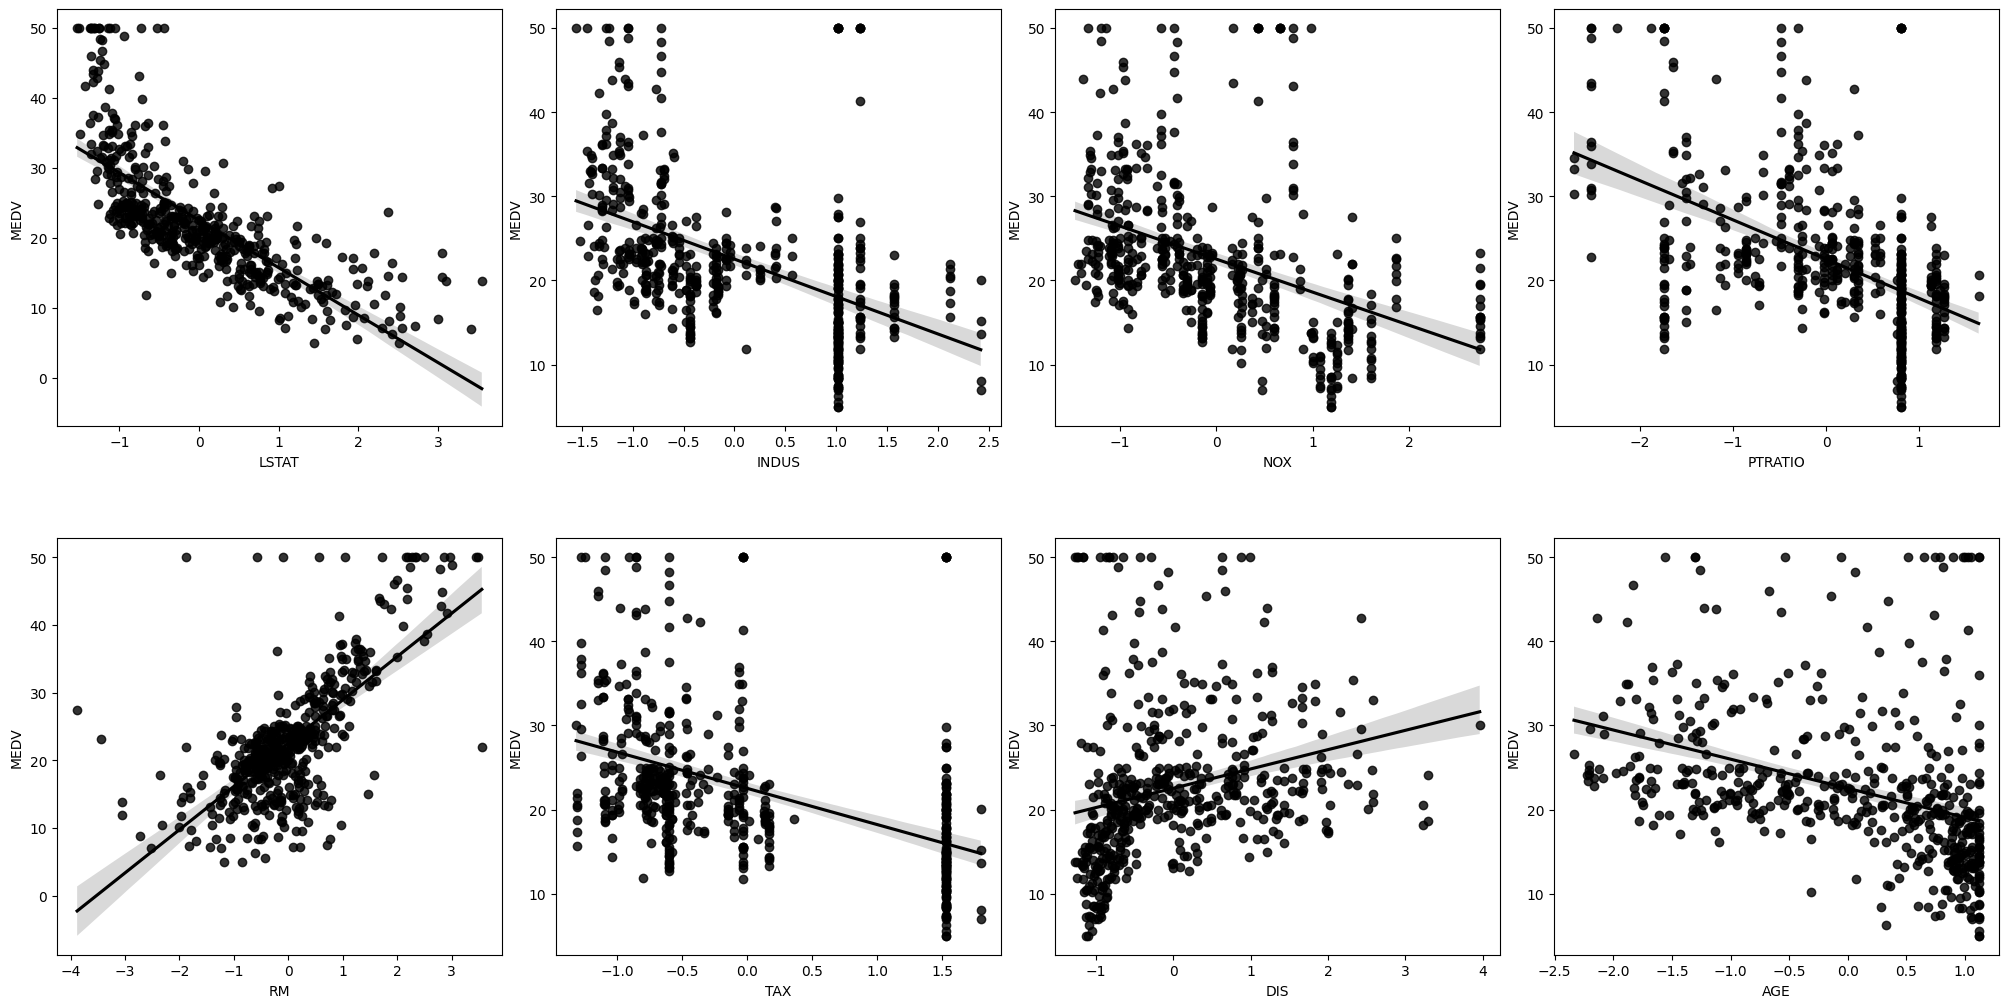

In [67]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y = y, x = x[k], ax = axs[i], color = 'black')
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [68]:
p_n = 100
lam_val = np.arange(start = 0.1, stop = 0.99, step = 0.01)
best_lam, lowest_MSE, arr_ret = techniques.grid_searchCV_L2(xin = np.array(x), yin = np.array(y), p = p_n, lam = lam_val, CV_groups = 20, classification = False)

The model with lowest MSE is : 11.030652552715175
The model parameters with lowest MSE is using lambda : 0.29999999999999993


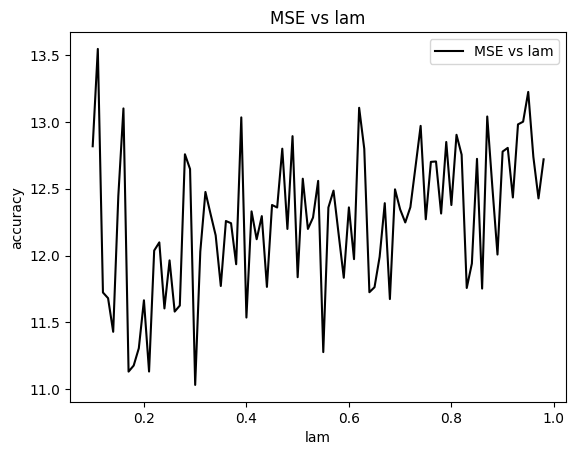

In [69]:
x_plot = np.arange(start = 0.1, stop = lam_val[lam_val.shape[0] -1] + 0.01, step = 0.01)
plt.plot(x_plot, arr_ret, color = 'black', label = 'MSE vs lam')
plt.title('MSE vs lam')
plt.xlabel('lam')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [70]:
ret = techniques.train_ELM_L2_REG(xin = np.array(x), yin = np.array(y), p = p_n, control = True, lam = best_lam)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(x), np.array(y), random_state = 0, train_size = 0.8)

In [72]:
y_pred = techniques.test_ELM(xin = X_test, Z = best_z, W = best_w, control = True, classification = False).reshape(-1,)

In [73]:
np.array(y_test).shape, y_pred.shape

((102,), (102,))

In [74]:
print(f"{np.array(y_test)}")

[22.6 50.  23.   8.3 21.2 19.9 20.6 18.7 16.1 18.6  8.8 17.2 14.9 10.5
 50.  29.  23.  33.3 29.4 21.  23.8 19.1 20.4 29.1 19.3 23.1 19.6 19.4
 38.7 18.7 14.6 20.  20.5 20.1 23.6 16.8  5.6 50.  14.5 13.3 23.9 20.
 19.8 13.8 16.5 21.6 20.3 17.  11.8 27.5 15.6 23.1 24.3 42.8 15.6 21.7
 17.1 17.2 15.  21.7 18.6 21.  33.1 31.5 20.1 29.8 15.2 15.  27.5 22.6
 20.  21.4 23.5 31.2 23.7  7.4 48.3 24.4 22.6 18.3 23.3 17.1 27.9 44.8
 50.  23.  21.4 10.2 23.3 23.2 18.9 13.4 21.9 24.8 11.9 24.3 13.8 24.7
 14.1 18.7 28.1 19.8]


In [75]:
print(f"{np.round(y_pred, 1)}")

[25.9 31.9 24.3 13.4 22.1 18.3 22.4 20.1 20.5 20.8 12.7 14.7 14.   7.
 48.1 33.2 23.1 34.4 31.2 20.2 23.5 20.1 20.2 28.2 18.9 20.6 16.6 17.2
 39.8 18.4 15.9 18.2 22.3 20.  26.9 18.5  9.3 34.  15.7 13.9 25.1 19.9
 20.1 17.  18.6 23.4 22.4 18.3 13.8 22.2 18.6 21.9 20.9 40.4 15.6 17.4
 17.3 18.4 30.5 18.1 19.7 21.6 33.4 30.7 19.2 28.9 13.9 18.7 15.6 22.7
 20.4 22.3 25.7 29.5 26.3  7.9 42.9 23.6 26.4 18.7 26.5 19.  26.7 44.8
 46.1 23.2 22.5 17.8 23.7 13.7 16.1  9.5 22.8 27.8 20.7 20.8 10.7 24.1
 13.6 19.5 25.6 19.9]
